In [1]:
#!/usr/bin/env python3
# !conda install requests
# !pip install fmpsdk
# !pip install requests

import os
import typing

from dotenv import load_dotenv

import fmpsdk

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# Actual API key is stored in a .env file.  Not good to store API key directly in script.
load_dotenv()
apikey = os.environ.get("apikey")


In [3]:
# Company Valuation Methods
symbol: str = "AAPL"
symbols: typing.List[str] = ["AAPL", "GOOG","CSCO", "DKS", "HD","RY"]
exchange: str = "NYSE"
exchanges: typing.List[str] = ["NYSE", "NASDAQ"]
query: str = "AA"
limit: int = 3
period: str = "quarter"
download: bool = True
market_cap_more_than: int = 1000000000
beta_more_than: int = 1
volume_more_than: int = 10000
sector: str = "Technology"
dividend_more_than: int = 0
industry: str = "Software"
filing_type: str = "10-K"

In [6]:
df_symbols = fmpsdk.symbols_list(apikey=apikey)
df_symbols = pd.DataFrame(df_symbols)
symbols = df_symbols[df_symbols['exchangeShortName']=='NYSE']['symbol'].to_list()[:50]
symbols
# df_symbols

['KMI',
 'GE',
 'BAC',
 'HPQ',
 'CX',
 'F',
 'SNAP',
 'WFC',
 'AIG',
 'T',
 'C',
 'VALE',
 'MS',
 'JPM',
 'ORCL',
 'NKE',
 'PG',
 'BBD',
 'PFE',
 'NOK',
 'TWTR',
 'XOM',
 'VIPS',
 'AXP',
 'BMY',
 'V',
 'KEY',
 'RF',
 'KR',
 'HAL',
 'BABA',
 'MRO',
 'GM',
 'FCX',
 'CRM',
 'SQ',
 'NUE',
 'SWN',
 'LOW',
 'RAD',
 'SLB',
 'ABBV',
 'GIS',
 'VZ',
 'XRX',
 'X',
 'DVN',
 'IBN',
 'MPC',
 'PM']

In [7]:
print(f"Company Profile: {fmpsdk.company_profile(apikey=apikey, symbol=symbol)=}")

Company Profile: fmpsdk.company_profile(apikey=apikey, symbol=symbol)=[{'symbol': 'AAPL', 'price': 143.35, 'beta': 1.222222, 'volAvg': 81453715, 'mktCap': 2369604288512, 'lastDiv': 0.85, 'range': '107.32-157.26', 'changes': 1.3500061, 'companyName': 'Apple Inc.', 'currency': 'USD', 'cik': '0000320193', 'isin': 'US0378331005', 'cusip': '037833100', 'exchange': 'Nasdaq Global Select', 'exchangeShortName': 'NASDAQ', 'industry': 'Consumer Electronics', 'website': 'http://www.apple.com', 'description': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support s

In [8]:
fmpsdk.quote(apikey=apikey, symbol=symbol)

[{'symbol': 'AAPL',
  'name': 'Apple Inc.',
  'price': 143.35,
  'changesPercentage': 0.9507085,
  'change': 1.3500061,
  'dayLow': 142.73,
  'dayHigh': 144.215,
  'yearHigh': 157.26,
  'yearLow': 107.32,
  'marketCap': 2369604288512.0,
  'priceAvg50': 147.696,
  'priceAvg200': 137.5631,
  'volume': 51564264,
  'avgVolume': 81453715,
  'exchange': 'NASDAQ',
  'open': 143.06,
  'previousClose': 142.0,
  'eps': 5.108,
  'pe': 28.063824,
  'earningsAnnouncement': '2021-07-27T16:30:00.000+0000',
  'sharesOutstanding': 16530200827,
  'timestamp': 1633636004}]

In [9]:
df_income = []
for symbol in symbols:
    df_income = df_income + fmpsdk.income_statement(apikey=apikey, symbol=symbol)

df_income = pd.DataFrame(df_income)

df_income['date']= pd.to_datetime(df_income['date'])
df_income.set_index(['symbol','date'],inplace=True)
df_income.sort_values(by=['symbol','date'],inplace=True)

df_income.columns

Index(['reportedCurrency', 'fillingDate', 'acceptedDate', 'period', 'revenue',
       'costOfRevenue', 'grossProfit', 'grossProfitRatio',
       'researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses',
       'sellingAndMarketingExpenses',
       'sellingGeneralAndAdministrativeExpenses', 'otherExpenses',
       'operatingExpenses', 'costAndExpenses', 'interestExpense',
       'depreciationAndAmortization', 'ebitda', 'ebitdaratio',
       'operatingIncome', 'operatingIncomeRatio',
       'totalOtherIncomeExpensesNet', 'incomeBeforeTax',
       'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
       'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil', 'link', 'finalLink'],
      dtype='object')

In [10]:
df_balance = []
for symbol in symbols:
    df_balance = df_balance + fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol)

df_balance = pd.DataFrame(df_balance)

df_balance['date']= pd.to_datetime(df_balance['date'])
df_balance.set_index(['symbol','date'],inplace=True)
df_balance.sort_values(by=['symbol','date'],inplace=True)

df_balance.columns

Index(['reportedCurrency', 'fillingDate', 'acceptedDate', 'period',
       'cashAndCashEquivalents', 'shortTermInvestments',
       'cashAndShortTermInvestments', 'netReceivables', 'inventory',
       'otherCurrentAssets', 'totalCurrentAssets', 'propertyPlantEquipmentNet',
       'goodwill', 'intangibleAssets', 'goodwillAndIntangibleAssets',
       'longTermInvestments', 'taxAssets', 'otherNonCurrentAssets',
       'totalNonCurrentAssets', 'otherAssets', 'totalAssets',
       'accountPayables', 'shortTermDebt', 'taxPayables', 'deferredRevenue',
       'otherCurrentLiabilities', 'totalCurrentLiabilities', 'longTermDebt',
       'deferredRevenueNonCurrent', 'deferredTaxLiabilitiesNonCurrent',
       'otherNonCurrentLiabilities', 'totalNonCurrentLiabilities',
       'otherLiabilities', 'totalLiabilities', 'commonStock',
       'retainedEarnings', 'accumulatedOtherComprehensiveIncomeLoss',
       'othertotalStockholdersEquity', 'totalStockholdersEquity',
       'totalLiabilitiesAndStockhol

In [11]:
df_cashflow = []
for symbol in symbols:
    df_cashflow = df_cashflow + fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol)

df_cashflow = pd.DataFrame(df_cashflow)

df_cashflow['date']= pd.to_datetime(df_cashflow['date'])
df_cashflow.set_index(['symbol','date'],inplace=True)
df_cashflow.sort_values(by=['symbol','date'],inplace=True)

df_cashflow.columns

Index(['reportedCurrency', 'fillingDate', 'acceptedDate', 'period',
       'netIncome', 'depreciationAndAmortization', 'deferredIncomeTax',
       'stockBasedCompensation', 'changeInWorkingCapital',
       'accountsReceivables', 'inventory', 'accountsPayables',
       'otherWorkingCapital', 'otherNonCashItems',
       'netCashProvidedByOperatingActivities',
       'investmentsInPropertyPlantAndEquipment', 'acquisitionsNet',
       'purchasesOfInvestments', 'salesMaturitiesOfInvestments',
       'otherInvestingActivites', 'netCashUsedForInvestingActivites',
       'debtRepayment', 'commonStockIssued', 'commonStockRepurchased',
       'dividendsPaid', 'otherFinancingActivites',
       'netCashUsedProvidedByFinancingActivities',
       'effectOfForexChangesOnCash', 'netChangeInCash', 'cashAtEndOfPeriod',
       'cashAtBeginningOfPeriod', 'operatingCashFlow', 'capitalExpenditure',
       'freeCashFlow', 'link', 'finalLink'],
      dtype='object')

In [12]:
df_keymetrics = []
for symbol in symbols:
    df_keymetrics = df_keymetrics + fmpsdk.key_metrics(apikey=apikey, symbol=symbol)

df_keymetrics = pd.DataFrame(df_keymetrics)

df_keymetrics['date']= pd.to_datetime(df_keymetrics['date'])
df_keymetrics.set_index(['symbol','date'],inplace=True)
df_keymetrics.sort_values(by=['symbol','date'],inplace=True)
df_keymetrics.columns

Index(['period', 'revenuePerShare', 'netIncomePerShare',
       'operatingCashFlowPerShare', 'freeCashFlowPerShare', 'cashPerShare',
       'bookValuePerShare', 'tangibleBookValuePerShare',
       'shareholdersEquityPerShare', 'interestDebtPerShare', 'marketCap',
       'enterpriseValue', 'peRatio', 'priceToSalesRatio', 'pocfratio',
       'pfcfRatio', 'pbRatio', 'ptbRatio', 'evToSales',
       'enterpriseValueOverEBITDA', 'evToOperatingCashFlow',
       'evToFreeCashFlow', 'earningsYield', 'freeCashFlowYield',
       'debtToEquity', 'debtToAssets', 'netDebtToEBITDA', 'currentRatio',
       'interestCoverage', 'incomeQuality', 'dividendYield', 'payoutRatio',
       'salesGeneralAndAdministrativeToRevenue',
       'researchAndDdevelopementToRevenue', 'intangiblesToTotalAssets',
       'capexToOperatingCashFlow', 'capexToRevenue', 'capexToDepreciation',
       'stockBasedCompensationToRevenue', 'grahamNumber', 'roic',
       'returnOnTangibleAssets', 'grahamNetNet', 'workingCapital',
   

In [47]:
df_dcf = []
for symbol in symbols:
    df_dcf = df_dcf + fmpsdk.discounted_cash_flow(apikey=apikey, symbol=symbol)

df_dcf = pd.DataFrame(df_dcf)

df_dcf['date']= pd.to_datetime(df_dcf['date'])
df_dcf.set_index(['symbol','date'],inplace=True)
df_dcf.sort_values(by=['symbol','date'],inplace=True)
df_dcf.columns

Index(['dcf', 'Stock Price'], dtype='object')

In [28]:
moat_columns = ["EV+Div","Earnings","Sales","Cash"]
df_moat_perShare = pd.DataFrame(index=df_income.index,columns=moat_columns)
df_moat_perShare["Sales"]=df_income['revenue']/df_income['weightedAverageShsOutDil']
df_moat_perShare["Earnings"]=df_income['netIncome']/df_income['weightedAverageShsOutDil']
df_moat_perShare["EV+Div"]=(df_balance['totalStockholdersEquity']+df_cashflow['dividendsPaid'].fillna(0))/df_income['weightedAverageShsOutDil']
df_moat_perShare["Cash"]=(df_cashflow['operatingCashFlow'])/df_income['weightedAverageShsOutDil']
df_moat_perShare.sort_values(by=['symbol','date'],inplace=True)
df_moat_perShare

EV+Div  Earnings      Sales      Cash
symbol date                                                
ABBV   2011-12-31   7.736527  2.172866  11.040475  3.953772
       2012-12-31   2.132530  3.344959  11.655041  4.023462
       2013-12-31   1.207606  2.573566  11.714464  3.907107
       2014-12-31  -0.570807  1.101863  12.397516  2.204348
       2015-12-31   0.397679  3.142334  13.963958  4.602932
...                      ...       ...        ...       ...
XRX    2016-12-31  18.453503 -1.863319  42.075082  4.277431
       2017-12-31  20.329735  0.760027  40.008575  0.132517
       2018-12-31  19.804498  1.434475  39.060637  4.529921
       2019-12-31  23.836788  5.802658  38.881670  5.716883
       2020-12-31  26.233269  0.902650  33.012548  2.576314

[495 rows x 4 columns]

C:\Users\Family\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


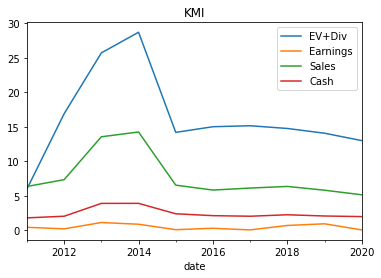

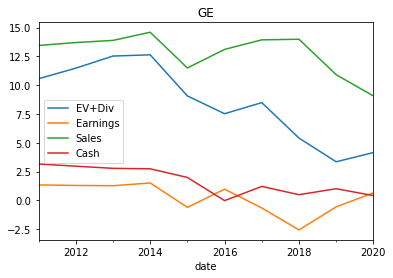

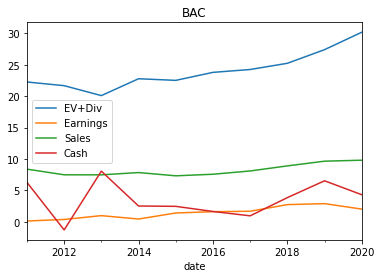

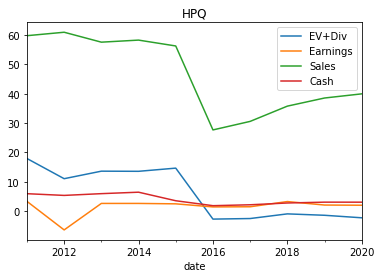

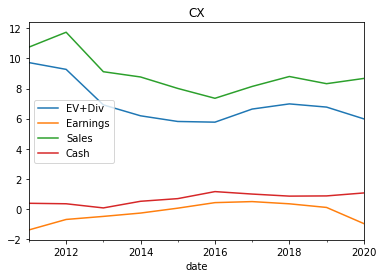

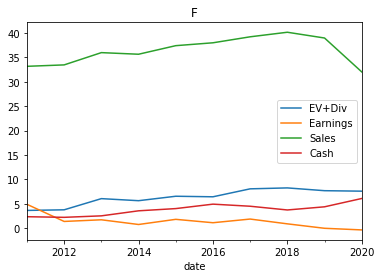

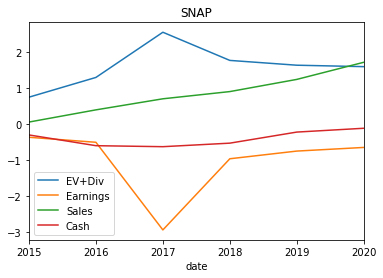

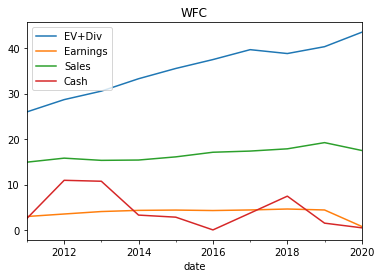

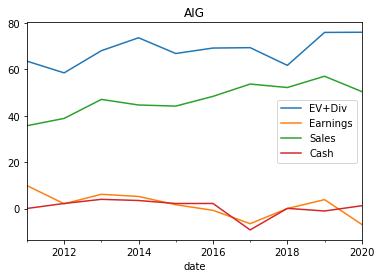

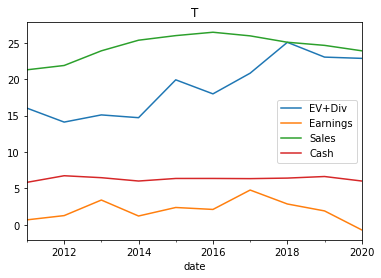

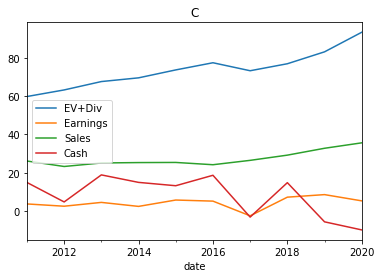

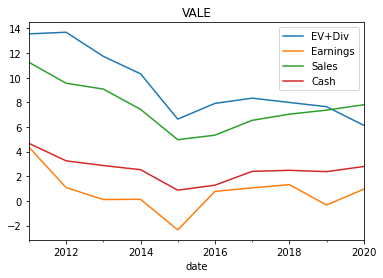

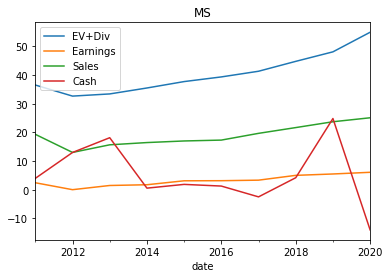

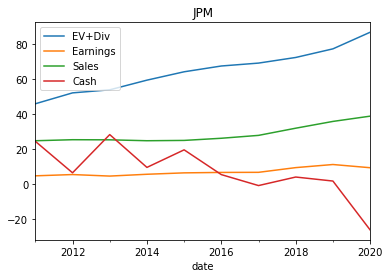

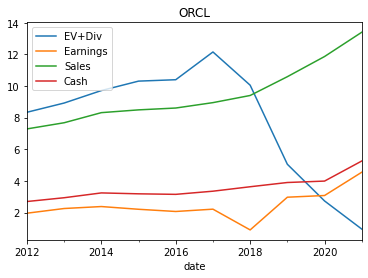

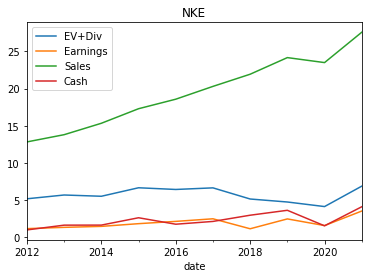

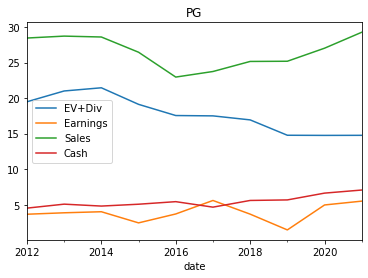

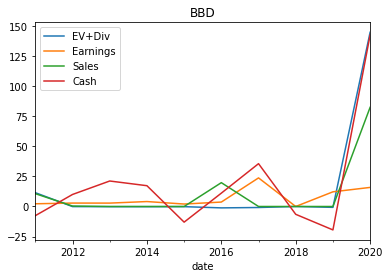

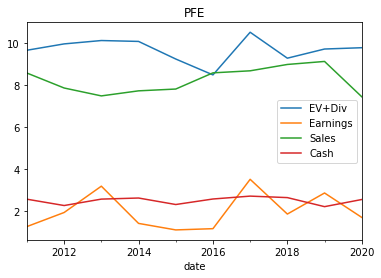

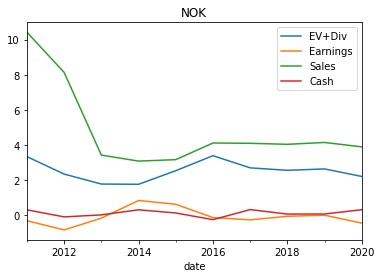

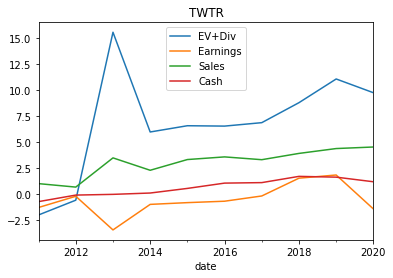

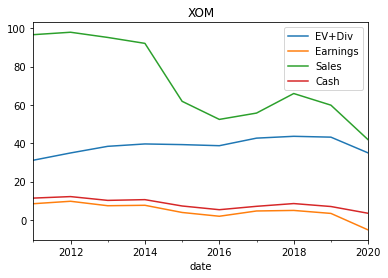

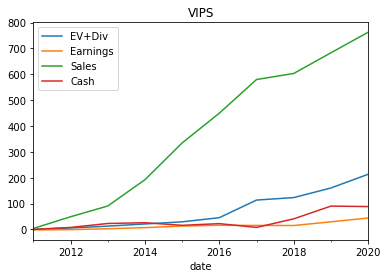

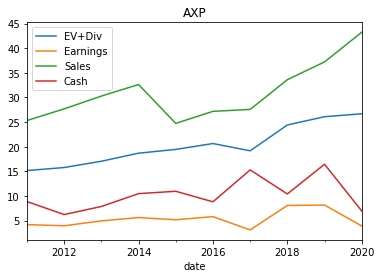

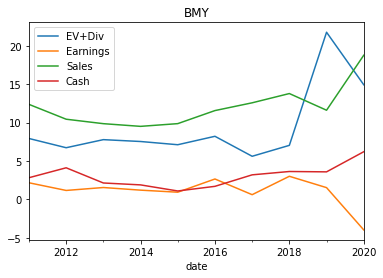

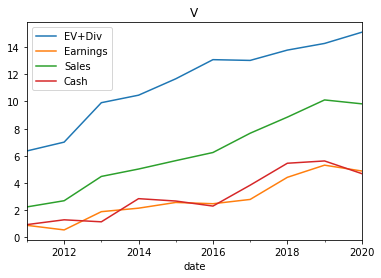

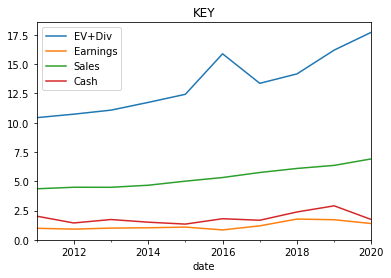

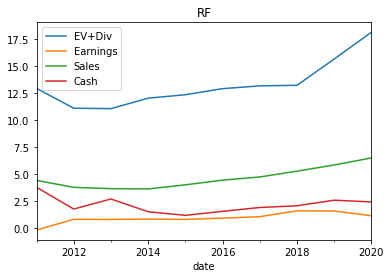

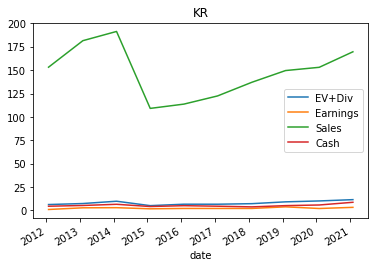

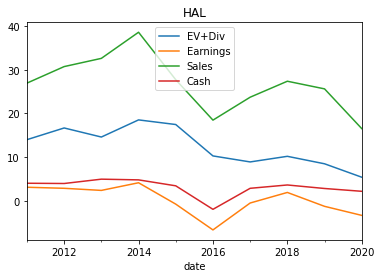

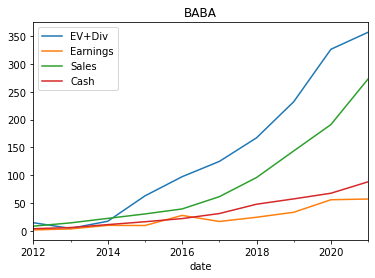

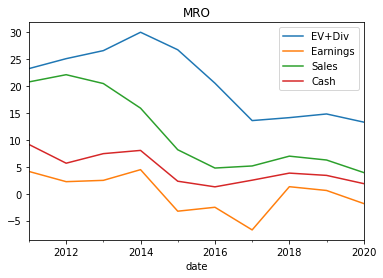

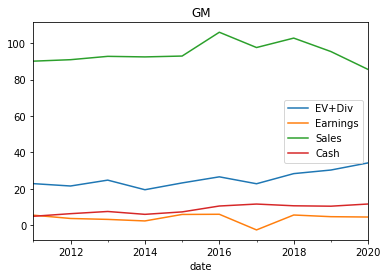

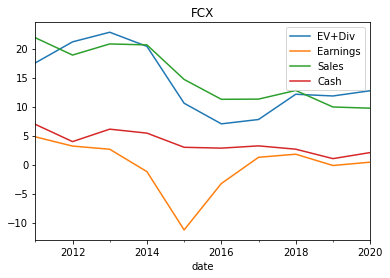

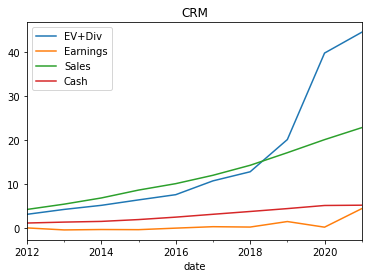

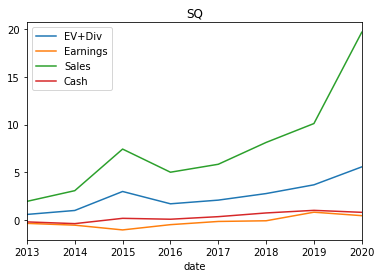

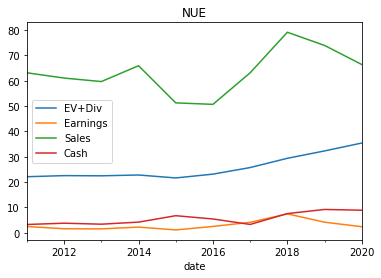

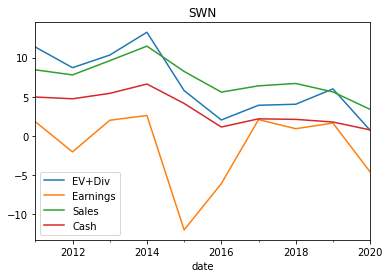

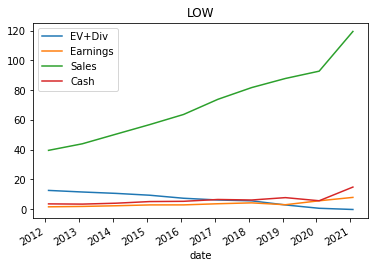

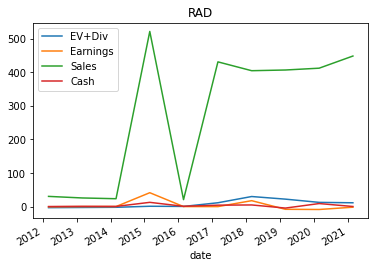

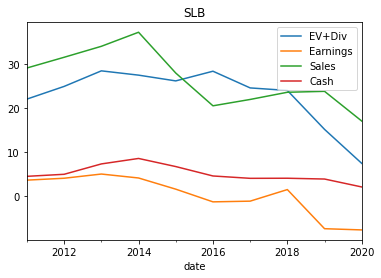

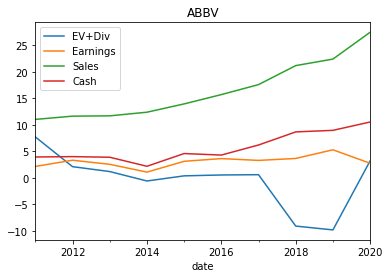

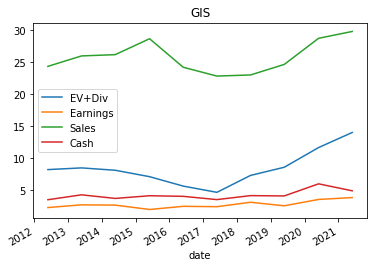

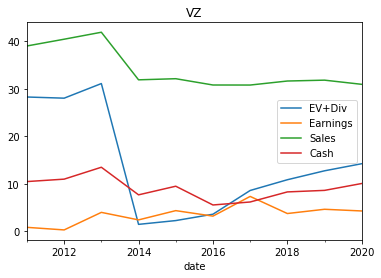

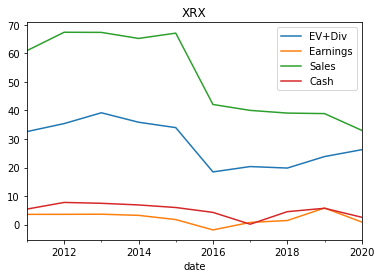

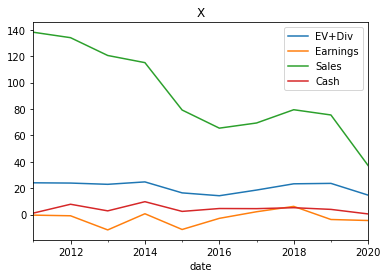

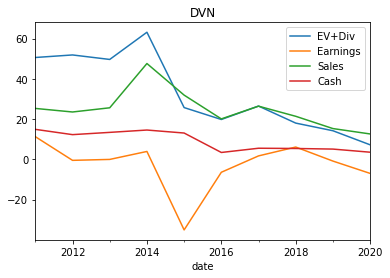

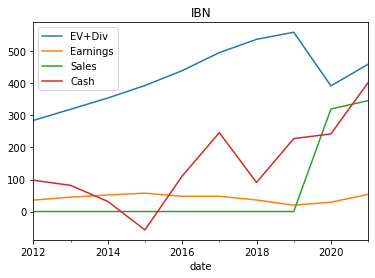

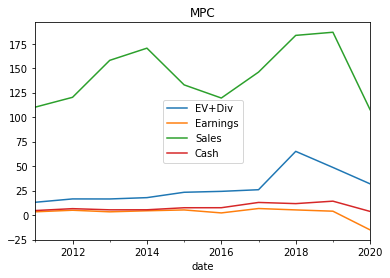

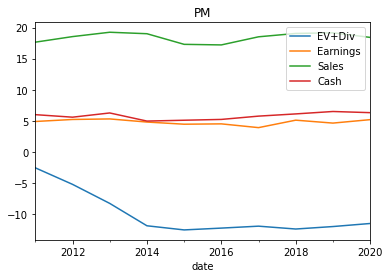

In [14]:
for symbol in symbols:
    df_moat_perShare.loc[symbol].plot(title=symbol)

In [30]:
df_moat_pct_chg = df_moat_perShare.copy()
df_moat_pct_chg = df_moat_pct_chg.groupby('symbol').pct_change()
df_moat_pct_chg

EV+Div  Earnings     Sales       Cash
symbol date                                               
ABBV   2011-12-31       NaN       NaN       NaN        NaN
       2012-12-31 -0.724356  0.539423  0.055665   0.017626
       2013-12-31 -0.433721 -0.230614  0.005098  -0.028919
       2014-12-31 -1.472677 -0.571853  0.058308  -0.435811
       2015-12-31 -1.696695  1.851836  0.126351   1.088115
...                     ...       ...       ...        ...
XRX    2016-12-31 -0.456781 -2.057674 -0.372649  -0.285618
       2017-12-31  0.101673 -1.407888 -0.049115  -0.969019
       2018-12-31 -0.025836  0.887401 -0.023693  33.183586
       2019-12-31  0.203605  3.045144 -0.004582   0.262027
       2020-12-31  0.100537 -0.844442 -0.150948  -0.549350

[495 rows x 4 columns]

In [31]:
df_moat_rolling5_pct_chg = df_moat_pct_chg.groupby('symbol').rolling(5,min_periods=1).median().reset_index(0,drop=True)
df_moat_rolling5_pct_chg['Windage_Growth_Rate'] = df_moat_rolling5_pct_chg.median(axis=1)
df_moat_rolling5_pct_chg

,EV+Div,Earnings,Sales,Cash,Windage_Growth_Rate
0,NaN,NaN,NaN,NaN,NaN
1,-0.724356,0.539423,0.055665,0.017626,0.036646
2,-0.579039,0.154405,0.030382,-0.005646,0.012368
3,-0.724356,-0.230614,0.055665,-0.028919,-0.129766
4,-1.098516,0.154405,0.056987,-0.005646,0.025670
...,...,...,...,...,...
490,-0.052677,-0.111643,-0.000814,-0.077040,-0.064859
491,-0.052677,-0.455231,-0.031391,-0.130330,-0.091504
492,-0.052677,-0.455231,-0.031391,-0.130330,-0.091504
493,-0.025836,-0.455231,-0.023693,-0.130330,-0.078083


In [32]:
mgt_columns = ("ROIC","ROE","LTD-to-FCF")
mgt_col_limits = (0.1,0.1,3)
df_mgt = pd.DataFrame(index=df_income.index,columns=mgt_columns)
df_mgt["ROIC"]=df_keymetrics["roic"]#(df_income['operatingIncome']*(1+df_income['incomeTaxExpense']/df_income['incomeBeforeTax']))/( (df_balance['longTermDebt'] + df_balance['shortTermDebt'] + df_balance['totalStockholdersEquity']))
df_mgt["ROE"]=df_keymetrics["roe"]#df_income['netIncome']/df_balance['totalStockholdersEquity']
df_mgt["LTD-to-FCF"]=df_balance['longTermDebt']/df_cashflow['freeCashFlow']
df_mgt

ROIC       ROE  LTD-to-FCF
symbol date                                      
ABBV   2011-12-31       NaN       NaN    0.000000
       2012-12-31  0.287515  1.568540    2.433466
       2013-12-31  0.253775  0.918967    2.474377
       2014-12-31  0.211247  1.018370    3.597208
       2015-12-31  0.178788  1.303929    4.175353
...                     ...       ...         ...
XRX    2016-12-31  0.076495 -0.094362    5.543365
       2017-12-31  0.070504  0.035409  -73.732394
       2018-12-31  0.093952  0.068723    4.065714
       2019-12-31  0.098777  0.233236    2.549685
       2020-12-31  0.015657  0.033046    0.718978

[495 rows x 3 columns]

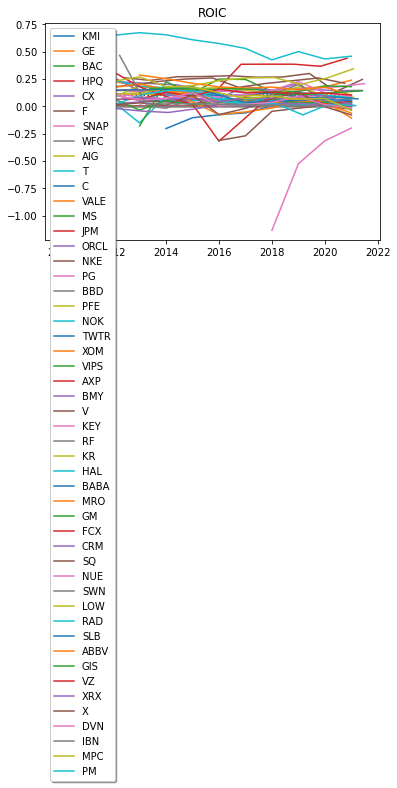

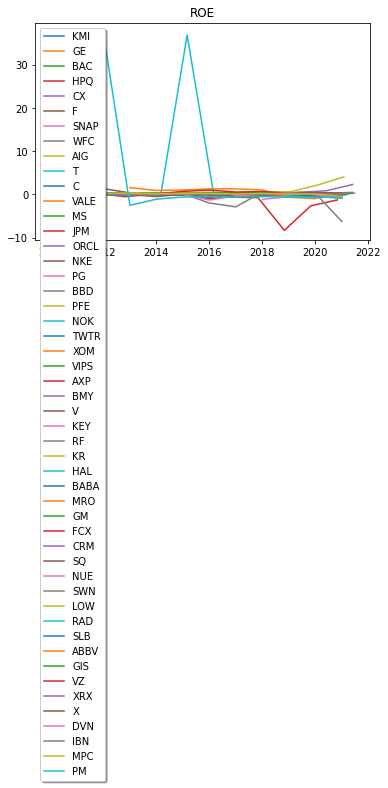

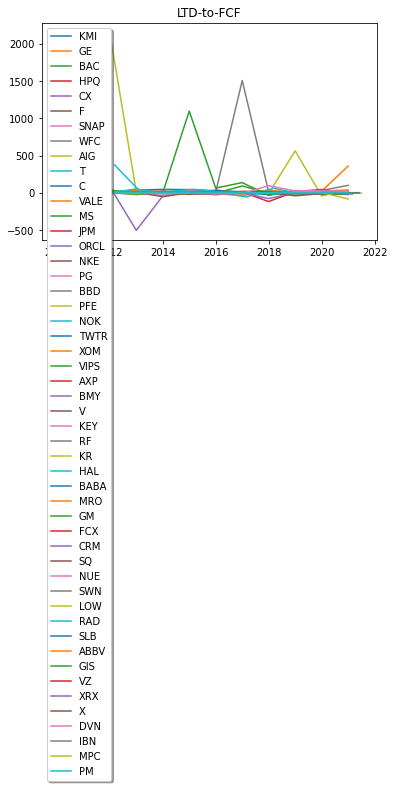

In [33]:
fig = []
ax = []

for column in mgt_columns:
  idx = mgt_columns.index(column)
  fig.append(idx)
  ax.append(idx)
  fig[idx], ax[idx] = plt.subplots()
  for symbol in symbols:
    ax[idx].plot(df_mgt.loc[symbol][column],label=symbol)
  plt.hlines(mgt_col_limits[idx], xmin=datetime.datetime(2010,1,1), xmax=datetime.datetime(2020,12,31), linestyle = 'dotted',colors='k')
  legend = ax[idx].legend(loc='best', shadow=True)
  plt.title(column)
plt.show()

In [34]:
REVENUE = 'revenue'
CHG_FIX_ASSETS_INT = 'investmentsInPropertyPlantAndEquipment'
NET_CASH_OPS = 'netCashProvidedByOperatingActivities'
SHARES_DILUTED = 'weightedAverageShsOutDil'
FCF = 'freeCashFlow'
PE = 'peRatio'
EPS = 'netIncomePerShare'

In [35]:
df_computed

Sales  Sales_1y_change          PPE  PPE_1y_change  \
symbol date                                                                    
ABBV   2011-12-31  1.744395e+10              NaN  355515000.0            NaN   
       2012-12-31  1.838000e+10     9.360490e+08  333000000.0    -22515000.0   
       2013-12-31  1.879000e+10     4.100000e+08  491000000.0    158000000.0   
       2014-12-31  1.996000e+10     1.170000e+09  612000000.0    121000000.0   
       2015-12-31  2.285900e+10     2.899000e+09  532000000.0    -80000000.0   
...                         ...              ...          ...            ...   
XRX    2016-12-31  1.077100e+10    -7.274000e+09   93000000.0   -158000000.0   
       2017-12-31  1.026500e+10    -5.060000e+08   69000000.0    -24000000.0   
       2018-12-31  9.830000e+09    -4.350000e+08   90000000.0     21000000.0   
       2019-12-31  9.066000e+09    -7.640000e+08   65000000.0    -25000000.0   
       2020-12-31  7.022000e+09    -2.044000e+09   74000000.0      9000000.0   

                       Cash_Ops  Shares_Diluted  PPE/Sales  \
symbol date                                                  
ABBV   2011-12-31  6.246960e+09      1580000000   0.020380   
       2012-12-31  6.345000e+09      1577000000   0.018118   
       2013-12-31  6.267000e+09      1604000000   0.026131   
       2014-12-31  3.549000e+09      1610000000   0.030661   
       2015-12-31  7.535000e+09      1637000000   0.023273   
...                         ...             ...        ...   
XRX    2016-12-31  1.095000e+09       255994750   0.008634   
       2017-12-31  3.400000e+07       256570000   0.006722   
       2018-12-31  1.140000e+09       251660000   0.009156   
       2019-12-31  1.333000e+09       233169000   0.007170   
       2020-12-31  5.480000e+08       212707000   0.010538   

                   PPE/Sales_10y_mean Growth_Capex Maint_Capex  ...  \
symbol date                                                     ...   
ABBV   2011-12-31            0.020380          NaN         NaN  ...   
       2012-12-31            0.019249          NaN         NaN  ...   
       2013-12-31            0.021543          NaN         NaN  ...   
       2014-12-31            0.023823          NaN         NaN  ...   
       2015-12-31            0.023713          NaN         NaN  ...   
...                               ...          ...         ...  ...   
XRX    2016-12-31            0.015036          NaN         NaN  ...   
       2017-12-31            0.013848          NaN         NaN  ...   
       2018-12-31            0.013262          NaN         NaN  ...   
       2019-12-31            0.012585          NaN         NaN  ...   
       2020-12-31            0.012380          NaN         NaN  ...   

                  Payback_Time Default_PE   PE PE_10y_mean  EPS EPS_10y_est  \
symbol date                                                                   
ABBV   2011-12-31          NaN        NaN  NaN         NaN  NaN         NaN   
       2012-12-31          NaN        NaN  NaN         NaN  NaN         NaN   
       2013-12-31          NaN        NaN  NaN         NaN  NaN         NaN   
       2014-12-31          NaN        NaN  NaN         NaN  NaN         NaN   
       2015-12-31          NaN        NaN  NaN         NaN  NaN         NaN   
...                        ...        ...  ...         ...  ...         ...   
XRX    2016-12-31          NaN        NaN  NaN         NaN  NaN         NaN   
       2017-12-31          NaN        NaN  NaN         NaN  NaN         NaN   
       2018-12-31          NaN        NaN  NaN         NaN  NaN         NaN   
       2019-12-31          NaN        NaN  NaN         NaN  NaN         NaN   
       2020-12-31          NaN        NaN  NaN         NaN  NaN         NaN   

                  Price_10y_est Sticker_Price MOS30 MOS50  
symbol date                                                
ABBV   2011-12-31           NaN           NaN   NaN   NaN  
       2012-12-31           NaN           NaN 

In [36]:
computed_columns = ['Sales','Sales_1y_change','PPE', 'PPE_1y_change','Cash_Ops','Shares_Diluted','PPE/Sales','PPE/Sales_10y_mean','Growth_Capex','Maint_Capex','Owner_Earnings','Owner_Earnings_per_share','10Cap'
                    ,'FCF', 'FCF_per_share','Windage_Growth_Rate','Payback_Time'
                    ,'Default_PE','PE','PE_10y_mean','EPS','EPS_10y_est','Price_10y_est','Sticker_Price','MOS30','MOS50']
target_ROR = 0.15
df_computed = pd.DataFrame(index=df_income.index,columns=computed_columns)

# for 10 Cap calculation
df_computed['Sales'] = df_income[REVENUE]
df_computed['Sales_1y_change']= df_computed.groupby('symbol')['Sales'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).reset_index(0,drop=True).to_numpy()
df_computed['PPE'] = -df_cashflow[CHG_FIX_ASSETS_INT]
df_computed['PPE_1y_change'] = df_computed.groupby('symbol')['PPE'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).reset_index(0,drop=True).to_numpy()
df_computed['Cash_Ops'] = df_cashflow[NET_CASH_OPS]
df_computed['Shares_Diluted'] = df_income[SHARES_DILUTED]
df_computed['PPE/Sales'] = df_computed['PPE']/df_computed['Sales']
df_computed['PPE/Sales_10y_mean'] = df_computed.groupby('symbol')['PPE/Sales'].rolling(10,min_periods=1).mean().reset_index(0,drop=True).to_numpy()#df.apply(df=df_computed['PPE/Sales'],func=rolling10)#df_computed['PPE/Sales'].rolling(window=10,min_periods=1).mean()
# for symbol in symbols:
# # #  df_computed.loc[ticker,'PPE/Sales_10y_mean'] = df_computed.loc[ticker]['PPE/Sales'].rolling(window=10,min_periods=1).mean()#df_computed.loc[ticker][-10:]['PPE/Sales'].mean()
#   df_computed.loc[symbol,'Windage_Growth_Rate'] = df_moat_perShare.loc[symbol,10]['EV+Div']
df_computed['Windage_Growth_Rate'] = df_moat_rolling5_pct_chg['Windage_Growth_Rate'].to_numpy()
df_computed['Growth_Capex'] = df_computed['Sales_1y_change'] * df_computed['PPE/Sales_10y_mean']
df_computed['Maint_Capex'] = df_computed['PPE'] - df_computed['Growth_Capex']
df_computed['Owner_Earnings'] = df_computed['Cash_Ops'] - df_computed['Maint_Capex']
df_computed['Owner_Earnings_per_share'] = df_computed['Owner_Earnings']/df_computed['Shares_Diluted']
df_computed['10Cap']=10*df_computed['Owner_Earnings_per_share']

# # for payback time calculation
df_computed['FCF'] = df_cashflow[FCF]
df_computed['FCF_per_share'] = df_computed['FCF']/df_computed['Shares_Diluted']
df_computed['Payback_Time'] = np.zeros(len(df_computed['Payback_Time']))
for i in range(8):
    df_computed['Payback_Time']=df_computed['Payback_Time']+df_computed['FCF_per_share']*((1+df_computed['Windage_Growth_Rate'])**i)

# # for MOS calculation
df_computed['Default_PE']=2*df_computed['Windage_Growth_Rate']*100
df_computed['PE']=df_keymetrics[PE]
df_computed['PE_10y_mean']=df_computed.groupby('symbol')['PE'].rolling(10,min_periods=1).mean().reset_index(0,drop=True).to_numpy()#sf.apply(df=df_computed['PE'],func=rolling_40)
df_computed['PE_10y_est'] = df_computed[['Default_PE','PE_10y_mean']].min(axis=1)
df_computed['EPS'] = df_keymetrics[EPS]
df_computed['EPS_10y_est'] = df_computed['EPS']*((1+df_computed['Windage_Growth_Rate'])**10)
df_computed['Price_10y_est'] = df_computed['EPS_10y_est']*df_computed['PE_10y_est']
df_computed['Sticker_Price'] = df_computed['Price_10y_est']/((1+target_ROR)**10)
df_computed['MOS50'] = df_computed['Sticker_Price']*0.5
df_computed['MOS30'] = df_computed['Sticker_Price']*0.7

df_computed[['Default_PE','PE','PE_10y_mean','PE_10y_est','EPS','EPS_10y_est','Price_10y_est','Sticker_Price','MOS30','MOS50']]
df_computed[['PPE','Growth_Capex','Maint_Capex','Windage_Growth_Rate','FCF','Payback_Time']]
# df_computed

PPE  Growth_Capex   Maint_Capex  \
symbol date                                                  
ABBV   2011-12-31  355515000.0           NaN           NaN   
       2012-12-31  333000000.0  1.801798e+07  3.149820e+08   
       2013-12-31  491000000.0  8.832610e+06  4.821674e+08   
       2014-12-31  612000000.0  2.787238e+07  5.841276e+08   
       2015-12-31  532000000.0  6.874299e+07  4.632570e+08   
...                        ...           ...           ...   
XRX    2016-12-31   93000000.0 -1.093718e+08  2.023718e+08   
       2017-12-31   69000000.0 -7.007219e+06  7.600722e+07   
       2018-12-31   90000000.0 -5.768832e+06  9.576883e+07   
       2019-12-31   65000000.0 -9.614779e+06  7.461478e+07   
       2020-12-31   74000000.0 -2.530501e+07  9.930501e+07   

                   Windage_Growth_Rate           FCF  Payback_Time  
symbol date                                                         
ABBV   2011-12-31                  NaN  5.891445e+09           NaN  
       2012-12-31             0.036646  6.012000e+09     34.710338  
       2013-12-31             0.012368  5.776000e+09     30.086305  
       2014-12-31            -0.129766  2.937000e+09      9.433914  
       2015-12-31             0.025670  7.003000e+09     37.461439  
...                                ...           ...           ...  
XRX    2016-12-31            -0.064859  9.570000e+08     23.930694  
       2017-12-31            -0.091504 -7.100000e+07     -1.620767  
       2018-12-31            -0.091504  1.050000e+09     24.436730  
       2019-12-31            -0.078083  1.268000e+09     33.301849  
       2020-12-31            -0.167367  5.480000e+08     11.837247  

[495 rows x 6 columns]

In [58]:
MOS_columns = ['CurrentPrice','10Cap','Payback','MOS30','MOS50','DCF']
df_MOS = pd.DataFrame(index=symbols,columns=MOS_columns)
# ytickers = dict.fromkeys(tickers)
for symbol in symbols:
#   ytickers[ticker] = yf.Ticker(ticker)
  df_MOS.loc[symbol]['CurrentPrice'] = df_dcf.loc[symbol]['Stock Price'][0]#fmpsdk.quote(apikey=apikey, symbol=symbol)[0]['price']#ytickers[ticker].info['currentPrice']
  df_MOS.loc[symbol]['10Cap'] = df_computed.loc[symbol].iloc[-1]['10Cap']
  df_MOS.loc[symbol]['Payback'] = df_computed.loc[symbol].iloc[-1]['Payback_Time']
  df_MOS.loc[symbol]['MOS30'] = df_computed.loc[symbol].iloc[-1]['MOS30']
  df_MOS.loc[symbol]['MOS50'] = df_computed.loc[symbol].iloc[-1]['MOS50']
  df_MOS.loc[symbol]['DCF'] = df_dcf.loc[symbol]['dcf'][0]

df_MOS['Buy'] = np.where((df_MOS['CurrentPrice']<df_MOS['MOS30'])|(df_MOS['CurrentPrice']<df_MOS['10Cap'])|(df_MOS['CurrentPrice']<df_MOS['Payback'])|(df_MOS['CurrentPrice']<0.5*df_MOS['DCF']),True, False)

df_MOS

,CurrentPrice,10Cap,Payback,MOS30,MOS50,DCF,Buy
KMI,16.94,24.889854,17.672493,-0.065837,-0.047027,17.463199,True
GE,105.51,-0.904573,0.056512,-0.069175,-0.04941,109.682457,False
BAC,44.15,43.247581,42.26345,6.939414,4.956724,88.203386,False
HPQ,28.05,26.048717,22.943872,2.108373,1.505981,31.482604,False
CX,6.65,6.747976,5.358933,-0.154116,-0.110083,7.285162,True
F,14.89,61.084823,37.508755,-0.017531,-0.012522,21.243637,True
SNAP,76.28,-0.868793,-0.944659,1.443679,1.031199,76.655357,False
WFC,47.76,4.961057,4.009157,0.082379,0.058842,111.765612,True
AIG,57.2,11.940512,1.624043,0.001287,0.00092,60.452006,False
T,27.09,37.460435,29.20369,0.28889,0.20635,28.445979,True


In [52]:
df_dcf.loc[symbol]

,dcf,Stock Price
date,,
2021-10-07,100.322657,95.65


In [38]:

print(f"Multiple Company Quotes: {fmpsdk.quote(apikey=apikey, symbol=symbols)=}")
print(f"Key Executives: {fmpsdk.key_executives(apikey=apikey, symbol=symbol)=}")
print(f"Search: {fmpsdk.search(apikey=apikey, query=query, exchange=exchange, limit=limit)=}")
print(f"Ticker Search: {fmpsdk.search_ticker(apikey=apikey, query=query, exchange=exchange, limit=limit)=}")
fmpsdk.financial_statement(apikey=apikey, symbol=symbol)
print(f"Annual Income Statement: {fmpsdk.income_statement(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Income Statement: {fmpsdk.income_statement(apikey=apikey, symbol=symbol, period='quarter')=}")
fmpsdk.income_statement(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Balance Sheet Statement: {fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Balance Sheet Statement: {fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Cash Flow Statement: {fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, )=}")
print(f"Quarterly Cash Flow Statement: {fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, download=download)
print(f"Financial Statement Symbols List: {fmpsdk.financial_statement_symbol_lists(apikey=apikey)=}")
print(f"Income Statement Growth: {fmpsdk.income_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Balance Sheet Statement Growth: {fmpsdk.balance_sheet_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Cash Flow Statement Growth: {fmpsdk.cash_flow_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Annual Income Statement as Reported : {fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Income Statement as Reported: {fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Balance Sheet Statement as Reported : {fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Balance Sheet Statement as Reported: {fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Cash Flow Statement as Reported : {fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Cash Flow Statement as Reported: {fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Full Financial Statement as Reported : {fmpsdk.financial_statement_full_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Full Financial Statement as Reported: {fmpsdk.financial_statement_full_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Financial Ratios (TTM): {fmpsdk.financial_ratios_ttm(apikey=apikey, symbol=symbol)=}")
print(f"Annual Financial Ratios: {fmpsdk.financial_ratios(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Financial Ratios: {fmpsdk.financial_ratios(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Annual Enterprise Values: {fmpsdk.enterprise_values(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Enterprise Values: {fmpsdk.enterprise_values(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Key Metrics (TTM): {fmpsdk.key_metrics_ttm(apikey=apikey, symbol=symbol)=}")
print(f"Annual Key Metrics: {fmpsdk.key_metrics(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Key Metrics: {fmpsdk.key_metrics(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Annual Financial Growth: {fmpsdk.financial_growth(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Financial Growth: {fmpsdk.financial_growth(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Company Rating: {fmpsdk.rating(apikey=apikey, symbol=symbol)=}")
print(f"Historical Company Rating: {fmpsdk.historical_rating(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Discounted Cash Flow: {fmpsdk.discounted_cash_flow(apikey=apikey, symbol=symbol)=}")
print(f"Annual Historical Discounted Cash Flow: {fmpsdk.historical_discounted_cash_flow(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Historical Discounted Cash Flow: {fmpsdk.historical_discounted_cash_flow(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Daily Historical Discounted Cash Flow: {fmpsdk.historical_daily_discounted_cash_flow(apikey=apikey, symbol=symbol)=}")
print(f"Market Capitalization: {fmpsdk.market_capitalization(apikey=apikey, symbol=symbol)=}")
print(f"Historical Market Capitalization: {fmpsdk.historical_market_capitalization(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Symbols List: {fmpsdk.symbols_list(apikey=apikey)=}")
print(f"Stock Screener (Sector Example): {fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, sector=sector, exchange=exchange, dividend_more_than=dividend_more_than, limit=limit)=}")
print(f"Stock Screener (Industry Example): {fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, sector=sector, industry=industry, exchange=exchange, dividend_more_than=dividend_more_than, limit=limit)=}")
print(f"Stock Screener (Multiple Exchanges Example): {fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, exchange=exchanges)=}")
print(f"Delisted Companies: {fmpsdk.delisted_companies(apikey=apikey, limit=limit)=}")
print(f"Stock News (Single): {fmpsdk.stock_news(apikey=apikey, tickers=symbol)=}")
print(f"Stock News (Multiple): {fmpsdk.stock_news(apikey=apikey, tickers=symbols)=}")
print(f"Stock News (Latest): {fmpsdk.stock_news(apikey=apikey, limit=limit)=}")
print(f"Earnings Surprises: {fmpsdk.earnings_surprises(apikey=apikey, symbol=symbol)=}")
print(f"SEC Filings: {fmpsdk.sec_filings(apikey=apikey, symbol=symbol, filing_type=filing_type)=}")
print(f"Press Releases: {fmpsdk.press_releases(apikey=apikey, symbol=symbol)=}")


Multiple Company Quotes: fmpsdk.quote(apikey=apikey, symbol=symbols)=[{'symbol': 'ABBV', 'name': 'AbbVie Inc.', 'price': 110.95, 'changesPercentage': 1.491033, 'change': 1.6299973, 'dayLow': 109.56, 'dayHigh': 111.79, 'yearHigh': 121.53, 'yearLow': 79.11, 'marketCap': 196068622336.0, 'priceAvg50': 111.55457, 'priceAvg200': 112.88007, 'volume': 6503162, 'avgVolume': 7130663, 'exchange': 'NYSE', 'open': 109.78, 'previousClose': 109.32, 'eps': 3.708, 'pe': 29.921791, 'earningsAnnouncement': '2021-07-30T07:44:05.000+0000', 'sharesOutstanding': 1767180012, 'timestamp': 1633637364}, {'symbol': 'AIG', 'name': 'American International Group, Inc.', 'price': 57.25, 'changesPercentage': -0.12212089, 'change': -0.0699997, 'dayLow': 57.155, 'dayHigh': 58.105, 'yearHigh': 58.105, 'yearLow': 29.12, 'marketCap': 48960315392.0, 'priceAvg50': 54.745144, 'priceAvg200': 50.422375, 'volume': 3413754, 'avgVolume': 4483027, 'exchange': 'NYSE', 'open': 57.63, 'previousClose': 57.32, 'eps': 4.793, 'pe': 11.944

Key Executives: fmpsdk.key_executives(apikey=apikey, symbol=symbol)=[{'title': 'Senior Vice President & Gen. Counsel', 'name': 'Ms. Suzanne Rich Folsom', 'pay': None, 'currencyPay': 'USD', 'gender': 'female', 'yearBorn': None, 'titleSince': None}, {'title': 'Vice President of Investor Relations and Financial Communications', 'name': 'Mr. Nicholas  Rolli', 'pay': None, 'currencyPay': 'USD', 'gender': 'male', 'yearBorn': None, 'titleSince': None}, {'title': 'Chief Science Officer', 'name': 'Prof. Manuel C. Peitsch', 'pay': None, 'currencyPay': 'USD', 'gender': '', 'yearBorn': None, 'titleSince': None}, {'title': 'Chief Information Officer', 'name': 'Mr. Patrick  Brunel', 'pay': None, 'currencyPay': 'USD', 'gender': 'male', 'yearBorn': None, 'titleSince': None}, {'title': 'Chief Technology Officer', 'name': 'Mr. Michael  Voegele', 'pay': None, 'currencyPay': 'USD', 'gender': 'male', 'yearBorn': None, 'titleSince': None}, {'title': 'Vice President of Treasury & Corporation Fin.', 'name': '

Quarterly Income Statement: fmpsdk.income_statement(apikey=apikey, symbol=symbol, period='quarter')=[{'date': '2021-06-30', 'symbol': 'PM', 'reportedCurrency': 'USD', 'fillingDate': '2021-07-27', 'acceptedDate': '2021-07-27 16:42:01', 'period': 'Q2', 'revenue': 7594000000, 'costOfRevenue': 2353000000, 'grossProfit': 5241000000, 'grossProfitRatio': 0.6901501185146168, 'researchAndDevelopmentExpenses': 0.0, 'generalAndAdministrativeExpenses': 27000000, 'sellingAndMarketingExpenses': 2093000000, 'sellingGeneralAndAdministrativeExpenses': 2120000000, 'otherExpenses': 19000000, 'operatingExpenses': 2139000000, 'costAndExpenses': 4492000000, 'interestExpense': 161000000, 'depreciationAndAmortization': 239000000, 'ebitda': 3218000000, 'ebitdaratio': 0.42375559652357125, 'operatingIncome': 3102000000, 'operatingIncomeRatio': 0.38727943112983937, 'totalOtherIncomeExpensesNet': 161000000, 'incomeBeforeTax': 2941000000, 'incomeBeforeTaxRatio': 0.38727943112983937, 'incomeTaxExpense': 646000000, '

Annual Balance Sheet Statement: fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol)=[{'date': '2020-12-31', 'symbol': 'PM', 'reportedCurrency': 'USD', 'fillingDate': '2021-02-09', 'acceptedDate': '2021-02-09 16:20:37', 'period': 'FY', 'cashAndCashEquivalents': 7280000000, 'shortTermInvestments': 0.0, 'cashAndShortTermInvestments': 7280000000, 'netReceivables': 3761000000, 'inventory': 9591000000, 'otherCurrentAssets': 860000000, 'totalCurrentAssets': 21492000000, 'propertyPlantEquipmentNet': 6365000000, 'goodwill': 5964000000, 'intangibleAssets': 2019000000, 'goodwillAndIntangibleAssets': 7983000000, 'longTermInvestments': 4798000000, 'taxAssets': 1410000000, 'otherNonCurrentAssets': 2767000000, 'totalNonCurrentAssets': 23323000000, 'otherAssets': 0.0, 'totalAssets': 44815000000, 'accountPayables': 2780000000, 'shortTermDebt': 3368000000, 'taxPayables': 7494000000, 'deferredRevenue': 0.0, 'otherCurrentLiabilities': 13467000000, 'totalCurrentLiabilities': 19615000000, 'longTerm

Quarterly Balance Sheet Statement: fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol, period=period)=[{'date': '2021-06-30', 'symbol': 'PM', 'reportedCurrency': 'USD', 'fillingDate': '2021-07-27', 'acceptedDate': '2021-07-27 16:42:01', 'period': 'Q2', 'cashAndCashEquivalents': 4915000000, 'shortTermInvestments': 0.0, 'cashAndShortTermInvestments': 4915000000, 'netReceivables': 4445000000, 'inventory': 8690000000, 'otherCurrentAssets': 693000000, 'totalCurrentAssets': 18743000000, 'propertyPlantEquipmentNet': 5975000000, 'goodwill': 5842000000, 'intangibleAssets': 1958000000, 'goodwillAndIntangibleAssets': 7800000000, 'longTermInvestments': 4633000000, 'taxAssets': 1112000000, 'otherNonCurrentAssets': 2423000000, 'totalNonCurrentAssets': 21943000000, 'otherAssets': 0.0, 'totalAssets': 40686000000, 'accountPayables': 2630000000, 'shortTermDebt': 1744000000, 'taxPayables': 6024000000, 'deferredRevenue': 0.0, 'otherCurrentLiabilities': 11510000000, 'totalCurrentLiabilities': 1588

Annual Cash Flow Statement: fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, )=[{'date': '2020-12-31', 'symbol': 'PM', 'reportedCurrency': 'USD', 'fillingDate': '2021-02-09', 'acceptedDate': '2021-02-09 16:20:37', 'period': 'FY', 'netIncome': 8056000000, 'depreciationAndAmortization': 981000000, 'deferredIncomeTax': -143000000, 'stockBasedCompensation': 0.0, 'changeInWorkingCapital': 128000000, 'accountsReceivables': 0.0, 'inventory': -165000000, 'accountsPayables': 406000000, 'otherWorkingCapital': -260000000, 'otherNonCashItems': 268000000, 'netCashProvidedByOperatingActivities': 9812000000, 'investmentsInPropertyPlantAndEquipment': 0.0, 'acquisitionsNet': -47000000, 'purchasesOfInvestments': 0.0, 'salesMaturitiesOfInvestments': 0.0, 'otherInvestingActivites': -1107000000, 'netCashUsedForInvestingActivites': -1154000000, 'debtRepayment': -4114000000, 'commonStockIssued': 0.0, 'commonStockRepurchased': 0.0, 'dividendsPaid': -7364000000, 'otherFinancingActivites': 2982000000, '

Quarterly Cash Flow Statement: fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, period=period)=[{'date': '2021-06-30', 'symbol': 'PM', 'reportedCurrency': 'USD', 'fillingDate': '2021-07-27', 'acceptedDate': '2021-07-27 16:42:01', 'period': 'Q2', 'netIncome': 2172000000, 'depreciationAndAmortization': 239000000, 'deferredIncomeTax': -31000000, 'stockBasedCompensation': 0.0, 'changeInWorkingCapital': 1113000000, 'accountsReceivables': 0.0, 'inventory': 462000000, 'accountsPayables': 51000000, 'otherWorkingCapital': -368000000, 'otherNonCashItems': 1000000.0, 'netCashProvidedByOperatingActivities': 3630000000, 'investmentsInPropertyPlantAndEquipment': 0.0, 'acquisitionsNet': -27000000, 'purchasesOfInvestments': 0.0, 'salesMaturitiesOfInvestments': 0.0, 'otherInvestingActivites': -156000000, 'netCashUsedForInvestingActivites': -183000000, 'debtRepayment': -406000000, 'commonStockIssued': 0.0, 'commonStockRepurchased': 0.0, 'dividendsPaid': -1873000000, 'otherFinancingActivites': -1

Financial Statement Symbols List: fmpsdk.financial_statement_symbol_lists(apikey=apikey)=['000012.SZ', '000020.KS', '000028.SZ', '000031.SZ', '000039.SZ', '000046.SZ', '000060.SZ', '0001.HK', '000250.KS', '0002.HK', '0003.HK', '000400.KS', '000400.SZ', '000415.SZ', '0004.HK', '000519.SZ', '000528.SZ', '000559.SZ', '000563.SZ', '0005.HK', '000636.SZ', '000681.SZ', '0006.HK', '000718.SZ', '000732.SZ', '000758.SZ', '0007.HK', '000826.SZ', '000869.SZ', '000877.SZ', '000898.SZ', '0008.HK', '000930.SZ', '000933.SZ', '000960.SZ', '000970.SZ', '0009.HK', '0010.HK', '0010.KL', '001130.KS', '0011.HK', '0012.HK', '001470.KS', '0014.HK', '001530.KS', '0016.HK', '0017.HK', '0018.HK', '0019.HK', '002004.SZ', '002048.SZ', '002145.SZ', '002155.SZ', '002174.SZ', '0021.HK', '002203.SZ', '002221.SZ', '002230.SZ', '002244.SZ', '002249.SZ', '002250.SZ', '002281.SZ', '0022.HK', '0023.HK', '0024.HK', '002595.SZ', '0025.HK', '002630.KS', '002653.SZ', '0026.HK', '0027.HK', '002810.KS', '0028.HK', '002967.SZ', 

Income Statement Growth: fmpsdk.income_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=[{'date': '2020-12-31', 'symbol': 'PM', 'period': 'FY', 'growthRevenue': -0.03727562489515182, 'growthCostOfRevenue': -0.08979358888994578, 'growthGrossProfit': -0.008656437901720921, 'growthGrossProfitRatio': 0.029727290316415588, 'growthResearchAndDevelopmentExpenses': 0, 'growthGeneralAndAdministrativeExpenses': -0.9889571948998178, 'growthSellingAndMarketingExpenses': 0, 'growthOtherExpenses': 0, 'growthOperatingExpenses': -0.1464406779661017, 'growthCostAndExpenses': -0.11568455301347931, 'growthInterestExpense': -0.08542713567839195, 'growthDepreciationAndAmortization': 13.863636363636363, 'growthEBITDA': 0.17427466150870405, 'growthEBITDARatio': 0.2197412799284477, 'growthOperatingIncome': 0.10812104960735491, 'growthOperatingIncomeRatio': 0.08955066722770862, 'growthTotalOtherIncomeExpensesNet': 0.08421052631578947, 'growthIncomeBeforeTax': 0.10950162074554295, 'growthIncomeBefore

Cash Flow Statement Growth: fmpsdk.cash_flow_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=[{'date': '2020-12-31', 'symbol': 'PM', 'period': 'FY', 'growthNetIncome': 0.12122477383437717, 'growthDepreciationAndAmortization': 0.017634854771784232, 'growthDeferredIncomeTax': 0.014184397163120567, 'growthStockBasedCompensation': 0, 'growthChangeInWorkingCapital': -1.224561403508772, 'growthAccountsReceivables': -1, 'growthInventory': -0.698905109489051, 'growthAccountsPayables': -0.09977827050997783, 'growthOtherWorkingCapital': -1.1546698393813206, 'growthOtherNonCashItems': -0.35108958837772397, 'growthNetCashProvidedByOperatingActivites': -0.02755203171456888, 'growthInvestmentsInPropertyPlantAndEquipment': -1, 'growthAcquisitionsNet': -0.9650817236255572, 'growthPurchasesOfInvestments': 0, 'growthSalesMaturitiesOfInvestments': 0, 'growthOtherInvestingActivites': -3.86046511627907, 'growthNetCashUsedForInvestingActivites': -0.3627829928216455, 'growthDebtRepayment': -0.231

Quarterly Income Statement as Reported: fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=[{'date': '2021-06-30', 'symbol': 'PM', 'period': 'Q2', 'othercomprehensiveincomelosscashflowhedgegainlossreclassificationtax': 0.0, 'costofgoodsandservicessold': 2353000000.0, 'netincomeloss': 2172000000.0, 'comprehensiveincomenetoftaxincludingportionattributabletononcontrollinginterest': 2385000000.0, 'netincomelossattributabletononcontrollinginterest': 126000000.0, 'othercomprehensiveincomelossreclassificationadjustmentfromaocipensionandotherpostretirementbenefitplansnetoftax': 81000000.0, 'grossprofit': 5241000000.0, 'operatingincomeloss': 3129000000.0, 'interestincomeexpensenet': -161000000.0, 'othercomprehensiveincomelosscashflowhedgegainlossbeforereclassificationtax': -2000000.0, 'othercomprehensiveincomelossreclassificationadjustmentfromaocipensionandotherpostretirementbenefitplanstax': 18000000.0, 'othercomprehensiveincomeforeigncurrencytranslationgainlossar

Annual Balance Sheet Statement as Reported : fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol)=[{'date': '2020-12-31', 'symbol': 'PM', 'period': 'FY', 'liabilities': 55446000000.0, 'treasurystockvalue': 35129000000.0, 'allowancefordoubtfulotherreceivablescurrent': 38000000.0, 'stockholdersequity': -12567000000.0, 'liabilitiesandstockholdersequity': 44815000000.0, 'liabilitiescurrent': 19615000000.0, 'inventoryrawmaterials': 1712000000.0, 'machineryandequipmentgross': 9460000000.0, 'cashandcashequivalentsatcarryingvalue': 7280000000.0, 'minorityinterest': 1936000000.0, 'stockholdersequityincludingportionattributabletononcontrollinginterest': -10631000000.0, 'retainedearningsaccumulateddeficit': 31638000000.0, 'intangibleassetsnetexcludinggoodwill': 2019000000.0, 'commonstockvalue': 0.0, 'additionalpaidincapitalcommonstock': 2105000000.0, 'inventoryfinishedgoods': 5816000000.0, 'propertyplantandequipmentnet': 6365000000.0, 'inventoryleaftobacco': 2063000000.0, 'com

Quarterly Balance Sheet Statement as Reported: fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=[{'date': '2021-06-30', 'symbol': 'PM', 'period': 'Q2', 'propertyplantandequipmentandfinanceleaserightofuseassetaccumulateddepreciationandamortization': 8640000000.0, 'liabilitiesandstockholdersequity': 40686000000.0, 'treasurystockvalue': 35056000000.0, 'allowancefordoubtfulotherreceivablescurrent': 37000000.0, 'stockholdersequity': -11113000000.0, 'propertyplantandequipmentandfinanceleaserightofuseassetafteraccumulateddepreciationandamortization': 5975000000.0, 'liabilities': 49886000000.0, 'liabilitiescurrent': 15884000000.0, 'treasurystockshares': 550736681.0, 'cashandcashequivalentsatcarryingvalue': 4915000000.0, 'minorityinterest': 1913000000.0, 'stockholdersequityincludingportionattributabletononcontrollinginterest': -9200000000.0, 'retainedearningsaccumulateddeficit': 32465000000.0, 'intangibleassetsnetexcludinggoodwill': 1958000000.0, 'commonst

Annual Cash Flow Statement as Reported : fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol)=[{'date': '2020-12-31', 'symbol': 'PM', 'period': 'FY', 'paymentsforproceedsfromhedgeinvestingactivities': 551000000.0, 'increasedecreaseinaccruedincometaxespayable': -260000000.0, 'pensioncontributions': 102000000.0, 'increasedecreaseinaccountspayable': 406000000.0, 'profitloss': 8592000000.0, 'proceedsfrompaymentsforotherfinancingactivities': -776000000.0, 'cashcashequivalentsrestrictedcashandrestrictedcashequivalents': 7285000000.0, 'deferredincometaxexpensebenefit': -143000000.0, 'cashcashequivalentsrestrictedcashandrestrictedcashequivalentsperiodincreasedecreaseincludingexchangerateeffect': 420000000.0, 'netcashprovidedbyusedinoperatingactivities': 9812000000.0, 'proceedsfromshorttermdebtmaturinginmorethanthreemonths': 45000000.0, 'repaymentsoflongtermdebt': 3999000000.0, 'incometaxespaidnet': 2785000000.0, 'proceedsfromissuanceoflongtermdebt': 3713000000.0, 'netcashprovid

Quarterly Cash Flow Statement as Reported: fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=[{'date': '2021-06-30', 'symbol': 'PM', 'period': 'Q2', 'paymentsforproceedsfromhedgeinvestingactivities': 52000000.0, 'increasedecreaseinaccruedincometaxespayable': -368000000.0, 'pensioncontributions': 167000000.0, 'increasedecreaseinaccountspayable': 51000000.0, 'profitloss': 2298000000.0, 'proceedsfrompaymentsforotherfinancingactivities': -195000000.0, 'cashcashequivalentsrestrictedcashandrestrictedcashequivalents': 1014000000.0, 'deferredincometaxexpensebenefit': -31000000.0, 'cashcashequivalentsrestrictedcashandrestrictedcashequivalentsperiodincreasedecreaseincludingexchangerateeffect': 1014000000.0, 'netcashprovidedbyusedinoperatingactivities': 3630000000.0, 'proceedsfromshorttermdebtmaturinginmorethanthreemonths': 0.0, 'repaymentsoflongtermdebt': 347000000.0, 'netcashprovidedbyusedininvestingactivities': -183000000.0, 'increasedecreaseinotheroperatingca

Annual Full Financial Statement as Reported : fmpsdk.financial_statement_full_as_reported(apikey=apikey, symbol=symbol)=[{'date': '2020-12-31', 'symbol': 'PM', 'period': 'FY', 'incrementalcommonsharesattributabletosharebasedpaymentarrangements': 1000000.0, 'minorityinterestownershippercentagebynoncontrollingowners': 0.33, 'definedbenefitplanpensionplanswithaccumulatedbenefitobligationsinexcessofplanassetsaggregatefairvalueofplanassets': 7700000000.0, 'federalincometaxexpensebenefitcontinuingoperations': -27000000.0, 'pensioncontributions': 102000000.0, 'amountoftaxcreditrelatedtooverpaymentofindirecttaxespendingamount': 90000000.0, 'definedbenefitplanexpectedfuturebenefitpaymentsyearfour': 390000000.0, 'deferredtaxassetsliabilitiesnet': 726000000.0, 'weightedaveragenumberofdilutedsharesoutstanding': 1558000000.0, 'sharebasedcompensationarrangementbysharebasedpaymentawardequityinstrumentsotherthanoptionsnonvestednumber': 4098240.0, 'othercomprehensiveincomelossnetinvestmenthedgegainloss

Quarterly Full Financial Statement as Reported: fmpsdk.financial_statement_full_as_reported(apikey=apikey, symbol=symbol, period=period)=[{'date': '2021-06-30', 'symbol': 'PM', 'period': 'Q2', 'entitycurrentreportingstatus': 'Yes', 'incrementalcommonsharesattributabletosharebasedpaymentarrangements': 2000000.0, 'otherliabilitiesmember': 424000000.0, 'entityemerginggrowthcompany': 'false', 'definedbenefitplannetperiodicbenefitcost': 145000000.0, 'employeeservicesharebasedcompensationnonvestedawardstotalcompensationcostnotyetrecognized': 211000000.0, 'eitamember': 0.49, 'netincomeloss': 4590000000.0, 'propertyplantandequipmentandfinanceleaserightofuseassetafteraccumulateddepreciationandamortization': 5975000000.0, 'finitelivedintangibleassetspurchaseaccountingadjustments': 7000000.0, 'switzerlandrestructuringfinalphasesmember': 130.0, 'netincomelossavailabletocommonstockholdersbasic': 4576000000.0, 'cashandcashequivalentsatcarryingvalue': 4915000000.0, 'profitloss': 4893000000.0, 'antidi

Financial Ratios (TTM): fmpsdk.financial_ratios_ttm(apikey=apikey, symbol=symbol)=[{'dividendYielTTM': 0.05069774734751477, 'dividendYielPercentageTTM': 5.069774734751477, 'peRatioTTM': 16.872133, 'pegRatioTTM': 1.4452345684907055, 'payoutRatioTTM': 0.8516059957173449, 'currentRatioTTM': 1.1799924452279023, 'quickRatioTTM': 0.5892722236212541, 'cashRatioTTM': 0.309430873835306, 'daysOfSalesOutstandingTTM': 53.95673284778343, 'daysOfInventoryOutstandingTTM': 329.88559542381694, 'operatingCycleTTM': 343.1899953040923, 'daysOfPayablesOutstandingTTM': 99.83879355174206, 'cashConversionCycleTTM': 35.45959296218804, 'grossProfitMarginTTM': 0.6802354584455752, 'operatingProfitMarginTTM': 0.41950181249792146, 'pretaxProfitMarginTTM': 0.397718580597958, 'netProfitMarginTTM': 0.29508796434866474, 'effectiveTaxRateTTM': 0.21707500627142737, 'returnOnAssetsTTM': 0.218084844909797, 'returnOnEquityTTM': -0.8552907439091982, 'returnOnCapitalEmployedTTM': 0.5085880170953956, 'netIncomePerEBTTTM': 0.74

Quarterly Financial Ratios: fmpsdk.financial_ratios(apikey=apikey, symbol=symbol, period=period)=[{'symbol': 'PM', 'date': '2021-06-30', 'period': 'Q2', 'currentRatio': 1.1799924452279023, 'quickRatio': 0.5892722236212541, 'cashRatio': 0.309430873835306, 'daysOfSalesOutstanding': 213.64564129575982, 'daysOfInventoryOutstanding': 332.3841903952401, 'operatingCycle': 385.0639375640576, 'daysOfPayablesOutstanding': 100.59498512537186, 'cashConversionCycle': 284.46895243868573, 'grossProfitMargin': 0.6901501185146168, 'operatingProfitMargin': 0.4084803792467738, 'pretaxProfitMargin': 0.38727943112983937, 'netProfitMargin': 0.2860152752172768, 'effectiveTaxRate': 0.21965317919075145, 'returnOnAssets': 0.05338445656982746, 'returnOnEquity': -0.23608695652173914, 'returnOnCapitalEmployed': 0.12507055882590112, 'netIncomePerEBT': 0.7385243114586875, 'ebtPerEbit': 0.9480980012894906, 'ebitPerRevenue': 0.4084803792467738, 'debtRatio': 1.2261220075701715, 'debtEquityRatio': -5.422391304347826, 'l

Annual Enterprise Values: fmpsdk.enterprise_values(apikey=apikey, symbol=symbol)=[{'symbol': 'PM', 'date': '2020-12-31', 'stockPrice': 79.650002, 'numberOfShares': 1557000000, 'marketCapitalization': 124015053114, 'minusCashAndCashEquivalents': 7280000000, 'addTotalDebt': 31536000000, 'enterpriseValue': 148271053114}, {'symbol': 'PM', 'date': '2019-12-31', 'stockPrice': 84.330002, 'numberOfShares': 1555000000, 'marketCapitalization': 131133153109.99998, 'minusCashAndCashEquivalents': 6861000000, 'addTotalDebt': 31045000000, 'enterpriseValue': 155317153110}, {'symbol': 'PM', 'date': '2018-12-31', 'stockPrice': 74.480003, 'numberOfShares': 1555000000, 'marketCapitalization': 115816404665, 'minusCashAndCashEquivalents': 6593000000, 'addTotalDebt': 31759000000, 'enterpriseValue': 140982404665}, {'symbol': 'PM', 'date': '2017-12-31', 'stockPrice': 107.940002, 'numberOfShares': 1552000000, 'marketCapitalization': 167522883104, 'minusCashAndCashEquivalents': 8447000000, 'addTotalDebt': 343390

Quarterly Key Metrics: fmpsdk.key_metrics(apikey=apikey, symbol=symbol, period=period)=[{'symbol': 'PM', 'date': '2021-06-30', 'period': 'Q2', 'revenuePerShare': 4.874197689345315, 'netIncomePerShare': 1.3940949935815148, 'operatingCashFlowPerShare': 2.329910141206675, 'freeCashFlowPerShare': 2.2477535301668805, 'cashPerShare': 3.1546854942233633, 'bookValuePerShare': -5.905006418485238, 'tangibleBookValuePerShare': -10.911424903722722, 'shareholdersEquityPerShare': -5.905006418485238, 'interestDebtPerShare': 18.818356867779205, 'marketCap': 154413380000, 'enterpriseValue': 178656380000, 'peRatio': 17.773179097605894, 'priceToSalesRatio': 20.333602844350803, 'pocfratio': 42.53812121212121, 'pfcfRatio': 44.092912621359226, 'pbRatio': -16.78406304347826, 'ptbRatio': -16.78406304347826, 'evToSales': 23.525991572293915, 'enterpriseValueOverEBITDA': 55.51783095090118, 'evToOperatingCashFlow': 49.21663360881543, 'evToFreeCashFlow': 51.01552826956025, 'earningsYield': 0.014066138569079959, 'f

Annual Financial Growth: fmpsdk.financial_growth(apikey=apikey, symbol=symbol)=[{'symbol': 'PM', 'date': '2020-12-31', 'period': 'FY', 'revenueGrowth': -0.03727562489515182, 'grossProfitGrowth': -0.008656437901720921, 'ebitgrowth': 0.10812104960735491, 'operatingIncomeGrowth': 0.10812104960735491, 'netIncomeGrowth': 0.12122477383437717, 'epsgrowth': 0.11674321503131489, 'epsdilutedGrowth': 0.11746137787056483, 'weightedAverageSharesGrowth': 0.0012861736334405145, 'weightedAverageSharesDilutedGrowth': 0.0012853470437017994, 'dividendsperShareGrowth': 0.027027060963290685, 'operatingCashFlowGrowth': -0.02755203171456888, 'freeCashFlowGrowth': -0.0030309590820523924, 'tenYRevenueGrowthPerShare': 0.24562579066907103, 'fiveYRevenueGrowthPerShare': 0.06540896314510537, 'threeYRevenueGrowthPerShare': -0.005083663243748409, 'tenYOperatingCFGrowthPerShare': 0.22805184283647184, 'fiveYOperatingCFGrowthPerShare': 0.2411424157088897, 'threeYOperatingCFGrowthPerShare': 0.09745182756048151, 'tenYNet

Quarterly Financial Growth: fmpsdk.financial_growth(apikey=apikey, symbol=symbol, period=period)=[{'symbol': 'PM', 'date': '2021-06-30', 'period': 'Q2', 'revenueGrowth': 0.0011865524060646012, 'grossProfitGrowth': -0.013180192054227076, 'ebitgrowth': -0.09192037470725996, 'operatingIncomeGrowth': -0.09192037470725996, 'netIncomeGrowth': -0.10173697270471464, 'epsgrowth': -0.10322580645161299, 'epsdilutedGrowth': -0.10322580645161299, 'weightedAverageSharesGrowth': 0, 'weightedAverageSharesDilutedGrowth': 0, 'dividendsperShareGrowth': -0.0031931878658860253, 'operatingCashFlowGrowth': 7.344827586206897, 'freeCashFlowGrowth': 12.6796875, 'tenYRevenueGrowthPerShare': 0.04400801468873409, 'fiveYRevenueGrowthPerShare': 0.13699512951941403, 'threeYRevenueGrowthPerShare': -0.01897781427233178, 'tenYOperatingCFGrowthPerShare': 0.0020875655869486186, 'fiveYOperatingCFGrowthPerShare': 0.522194873214639, 'threeYOperatingCFGrowthPerShare': -0.09265958688295017, 'tenYNetIncomeGrowthPerShare': 0.025

Company Rating: fmpsdk.rating(apikey=apikey, symbol=symbol)=[{'symbol': 'PM', 'date': '2021-10-06', 'rating': 'B', 'ratingScore': 3, 'ratingRecommendation': 'Neutral', 'ratingDetailsDCFScore': 5, 'ratingDetailsDCFRecommendation': 'Strong Buy', 'ratingDetailsROEScore': 2, 'ratingDetailsROERecommendation': 'Sell', 'ratingDetailsROAScore': 3, 'ratingDetailsROARecommendation': 'Neutral', 'ratingDetailsDEScore': 1, 'ratingDetailsDERecommendation': 'Strong Sell', 'ratingDetailsPEScore': 5, 'ratingDetailsPERecommendation': 'Strong Buy', 'ratingDetailsPBScore': 1, 'ratingDetailsPBRecommendation': 'Strong Sell'}]
Historical Company Rating: fmpsdk.historical_rating(apikey=apikey, symbol=symbol, limit=limit)=[{'symbol': 'PM', 'date': '2020-12-31', 'period': 'FY', 'revenueGrowth': -0.03727562489515182, 'grossProfitGrowth': -0.008656437901720921, 'ebitgrowth': 0.10812104960735491, 'operatingIncomeGrowth': 0.10812104960735491, 'netIncomeGrowth': 0.12122477383437717, 'epsgrowth': 0.11674321503131489,

Daily Historical Discounted Cash Flow: fmpsdk.historical_daily_discounted_cash_flow(apikey=apikey, symbol=symbol)=[{'symbol': 'PM', 'date': '2021-10-06', 'dcf': 99.79064102564102}, {'symbol': 'PM', 'date': '2021-10-05', 'dcf': 99.54064102564102}, {'symbol': 'PM', 'date': '2021-10-04', 'dcf': 99.34064102564102}, {'symbol': 'PM', 'date': '2021-10-01', 'dcf': 99.23064102564102}, {'symbol': 'PM', 'date': '2021-09-30', 'dcf': 97.94064102564103}, {'symbol': 'PM', 'date': '2021-09-29', 'dcf': 102.64064102564103}, {'symbol': 'PM', 'date': '2021-09-28', 'dcf': 101.57064102564102}, {'symbol': 'PM', 'date': '2021-09-27', 'dcf': 103.52064102564103}, {'symbol': 'PM', 'date': '2021-09-24', 'dcf': 104.97064102564103}, {'symbol': 'PM', 'date': '2021-09-23', 'dcf': 104.60064102564102}]
Market Capitalization: fmpsdk.market_capitalization(apikey=apikey, symbol=symbol)=[{'symbol': 'PM', 'date': '2021-10-06', 'marketCap': 150617308692.48}]
Historical Market Capitalization: fmpsdk.historical_market_capitali

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

ERROR:root:Invalid industry value: Software.  Valid options: ['Entertainment', 'Oil & Gas Midstream', 'Semiconductors', 'Specialty Industrial Machinery', 'Banks Diversified', 'Consumer Electronics', 'Software Infrastructure', 'Broadcasting', 'Computer Hardware', 'Building Materials', 'Resorts & Casinos', 'Auto Manufacturers', 'Internet Content & Information', 'Insurance Diversified', 'Telecom Services', 'Metals & Mining', 'Capital Markets', 'Steel', 'Footwear & Accessories', 'Household & Personal Products', 'Other Industrial Metals & Mining', 'Oil & Gas E&P', 'Banks Regional', 'Drug Manufacturers General', 'Internet Retail', 'Communication Equipment', 'Semiconduct

Stock Screener (Sector Example): fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, sector=sector, exchange=exchange, dividend_more_than=dividend_more_than, limit=limit)=[{'symbol': 'TSM', 'companyName': 'Taiwan Semiconductor Manufacturing Company Limited', 'marketCap': 624663265280, 'sector': 'Technology', 'industry': 'Semiconductors', 'beta': 1.010577, 'price': 110.84, 'lastAnnualDividend': 1.725109, 'volume': 7956707, 'exchange': 'New York Stock Exchange', 'exchangeShortName': 'NYSE', 'country': 'TW', 'isEtf': False, 'isActivelyTrading': True}, {'symbol': 'CRM', 'companyName': 'salesforce.com, inc.', 'marketCap': 252288319488, 'sector': 'Technology', 'industry': 'Software—Application', 'beta': 1.040211, 'price': 274.55, 'lastAnnualDividend': 0, 'volume': 6155903, 'exchange': 'New York Stock Exchange', 'exchangeShortName': 'NYSE', 'country': 'US', 'isEtf': False, 'isActivelyTrading': True},

Stock News (Multiple): fmpsdk.stock_news(apikey=apikey, tickers=symbols)=[{'symbol': 'BAC', 'publishedDate': '2021-10-07 16:02:55', 'title': 'Thursday Afternoon Analyst Upgrades and Downgrades: Amazon, Bank of America, BioNTech, Chipotle, Disney and More', 'image': 'https://cdn.snapi.dev/images/v1/b/r/catalog-mail9-1040341.jpg', 'site': '24/7 Wall Street', 'text': "Markets climbed higher on Thursday after lawmakers in Washington reached an agreement to extend the government's debt ceiling, preventing a shutdown.", 'url': 'https://247wallst.com/investing/2021/10/07/thursday-afternoon-analyst-upgrades-and-downgrades-amazon-bank-of-america-biontech-chipotle-disney-and-more/'}, {'symbol': 'KEY', 'publishedDate': '2021-10-07 16:00:00', 'title': 'KeyBank Doubles SBA 7(a) Lending Volume, Remains a Top Small Business Lender in the Country', 'image': 'https://cdn.snapi.dev/images/v1/a/z/press20-1040338.jpg', 'site': 'PRNewsWire', 'text': "CLEVELAND, Oct. 7, 2021 /PRNewswire/ --\xa0KeyBank today

Earnings Surprises: fmpsdk.earnings_surprises(apikey=apikey, symbol=symbol)=[{'date': '2021-07-20', 'symbol': 'PM', 'actualEarningResult': 1.57, 'estimatedEarning': 1.55}, {'date': '2021-04-20', 'symbol': 'PM', 'actualEarningResult': 1.57, 'estimatedEarning': 1.4}, {'date': '2021-02-04', 'symbol': 'PM', 'actualEarningResult': 1.26, 'estimatedEarning': 1.21}, {'date': '2020-10-20', 'symbol': 'PM', 'actualEarningResult': 1.42, 'estimatedEarning': 1.36}, {'date': '2020-07-21', 'symbol': 'PM', 'actualEarningResult': 1.29, 'estimatedEarning': 1.1}, {'date': '2020-04-21', 'symbol': 'PM', 'actualEarningResult': 1.21, 'estimatedEarning': 1.13}, {'date': '2020-02-06', 'symbol': 'PM', 'actualEarningResult': 1.22, 'estimatedEarning': 1.21}, {'date': '2019-10-17', 'symbol': 'PM', 'actualEarningResult': 1.43, 'estimatedEarning': 1.36}, {'date': '2019-07-18', 'symbol': 'PM', 'actualEarningResult': 1.46, 'estimatedEarning': 1.32}, {'date': '2019-04-18', 'symbol': 'PM', 'actualEarningResult': 1.09, 'e